In [1]:
#importing dependencies
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [10]:
#understanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
#access data attributors
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print (index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [12]:
#reshaping data
data = dataset[:,12].reshape(-1,1)

In [13]:
#shape of the data
np.shape(dataset)

(506, 13)

In [14]:
#target value
target = boston.target.reshape(-1,1)


In [15]:
#shape of the target
np.shape(target)

(506, 1)

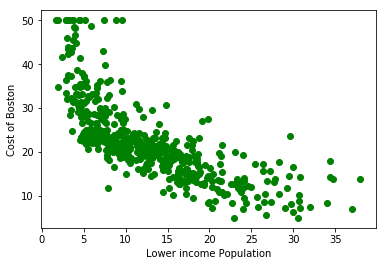

In [42]:
#ensuring that matplotlib is working inside the notebook 
%matplotlib inline
plt.scatter(data, target, color = 'green')
plt.xlabel('Lower income Population')
plt.ylabel('Cost of Boston')
plt.show()

In [43]:
#regression
from sklearn.linear_model import LinearRegression

In [44]:
#creating a regression model
reg = LinearRegression()

In [45]:
#fit the model
reg.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
#prediction
pred = reg.predict(data)

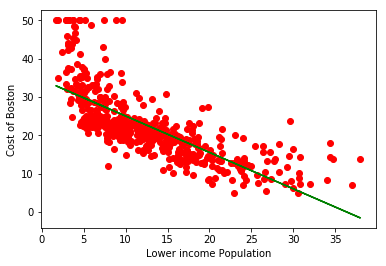

In [49]:
%matplotlib inline
plt.scatter(data, target, color = 'red')
plt.plot(data,pred,color = 'green')
plt.xlabel('Lower income Population')
plt.ylabel('Cost of Boston')
plt.show()

In [50]:
#circumventing curve issue using polynomial mode
from sklearn.preprocessing import PolynomialFeatures

In [51]:
#to allow merging of models
from sklearn.pipeline import make_pipeline

In [56]:
model = make_pipeline(PolynomialFeatures(5),reg)
model.fit(data,target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [58]:
pred = model.predict(data)

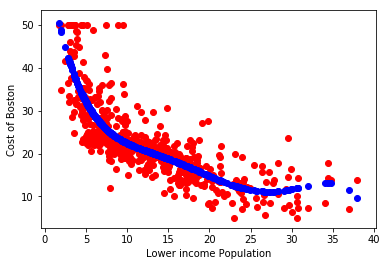

In [59]:
%matplotlib inline
plt.scatter(data, target, color = 'red')
plt.scatter(data, pred, color = "blue")
plt.xlabel('Lower income Population')
plt.ylabel('Cost of Boston')
plt.show()